# Goals
Reproduce the list of most responsive neurons on FWD preset, by analyzing interactome's data

See Interactome 2019 paper > Posterior Touch Response Stimulation Scenario

## Timeseries per interesting neuron

In [7]:
import project_path
from util.neuron_metadata import *
from util.plot_util import *
from util.data_accessor import *
import numpy as np
import os
import pandas as pd
from neural_model import NeuralModel
neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json(
  get_data_file_abs_path('chem.json'))
fwd_dynamics_gold = np.load(
  get_data_file_abs_path('dynamics_fwd_5s.npy'))

model = NeuralModel(neuron_metadata_collection)
model.seed = 0
model.set_current_injection("AVBL", 2.3)
model.set_current_injection("AVBR", 2.3)
model.set_current_injection("PLML", 1.4)
model.set_current_injection("PLMR", 1.4)
model.init()
(v_mat, s_mat, v_normalized_mat) = model.run(570)
# Note that the analysis being done by the interactome is from timestep 50 onward
# The initial 50 timesteps have a huge spike, and we wait for the network to settle first.
fwd_dynamics_mine = v_normalized_mat[50:,:]

/home/stephen/Documents/code/c-elegans-interactome-analysis/data/chem.json


In [9]:
# Choose which dynamics file you want to use.
fwd_dynamics = fwd_dynamics_mine
#fwd_dynamics = fwd_dynamics_gold

As shown below, the dynamics generated by the interactome and from our built-from-scratch model matches!

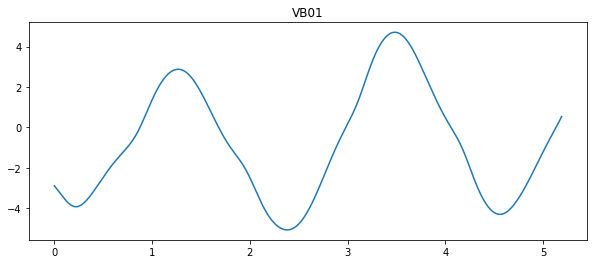

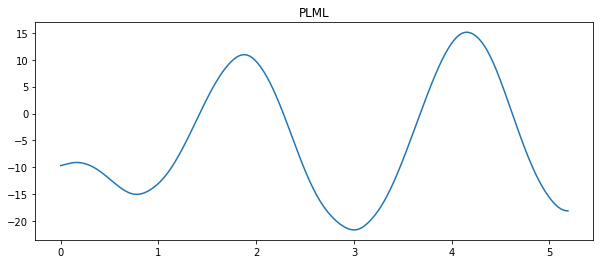

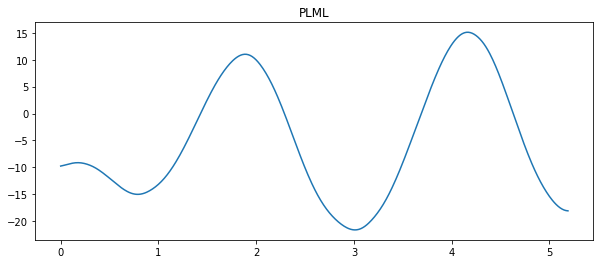

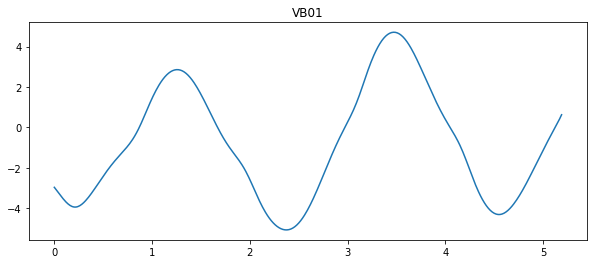

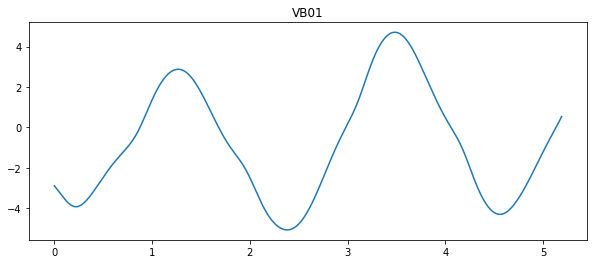

In [10]:
plot_saved_dynamics(['PLML'], fwd_dynamics_mine, neuron_metadata_collection)
plot_saved_dynamics(['PLML'], fwd_dynamics_gold, neuron_metadata_collection)
plot_saved_dynamics(['VB01'], fwd_dynamics_mine, neuron_metadata_collection)
plot_saved_dynamics(['VB01'], fwd_dynamics_gold, neuron_metadata_collection)

Great! We reproduced these statements
 * There are oscillations
 * The period is ~2s.

## Most responsive neurons

In [4]:
def get_amplitude(timeseries):
    return timeseries.max() - timeseries.min()

In [5]:
amplitude_results = []
for id in range(neuron_metadata_collection.get_size()):
    amplitude = get_amplitude(fwd_dynamics[:,id])
    meta = neuron_metadata_collection.get_metadata(id)
    amplitude_results.append(
        (meta.name, NeuronMetadataCollection.neuron_type_to_str(meta.neuron_type), amplitude))

### Motor neurons analysis

In [6]:
df = pd.DataFrame(amplitude_results, columns =['name', 'type', 'amplitude'])
df[df['type'] == 'MOTOR'].nlargest(50, ['amplitude'])

,name,type,amplitude
193,VB06,MOTOR,69.279170
186,VB05,MOTOR,68.597603
179,VB04,MOTOR,68.127504
172,DB03,MOTOR,59.923246
188,DB04,MOTOR,58.886134
202,VB07,MOTOR,57.105132
36,RID,MOTOR,55.063199
170,VB03,MOTOR,52.008928
152,DB02,MOTOR,50.809212
212,VB08,MOTOR,43.664757


Statement to reproduce:

"In motor neurons, most active neurons (by maximum voltage amplitude above the threshold) appear to be Ventricular and Dorsal type B (VB, DB) neurons alongside with Ventricular and Dorsal type D (VD, DD) and AS motorneurons (AS01 – AS10). These neurons have identical oscillatory period of ∼2 s, however, their dynamics are out of phase to each other."

Hrm, somewhat reproduced. I see all these, but they're not exactly the top ones. Even after I expand to top 50, only 7 out of the 10 AS's get shown. The oscillatory period and out of phase dynamics statement is reproduced successfully.

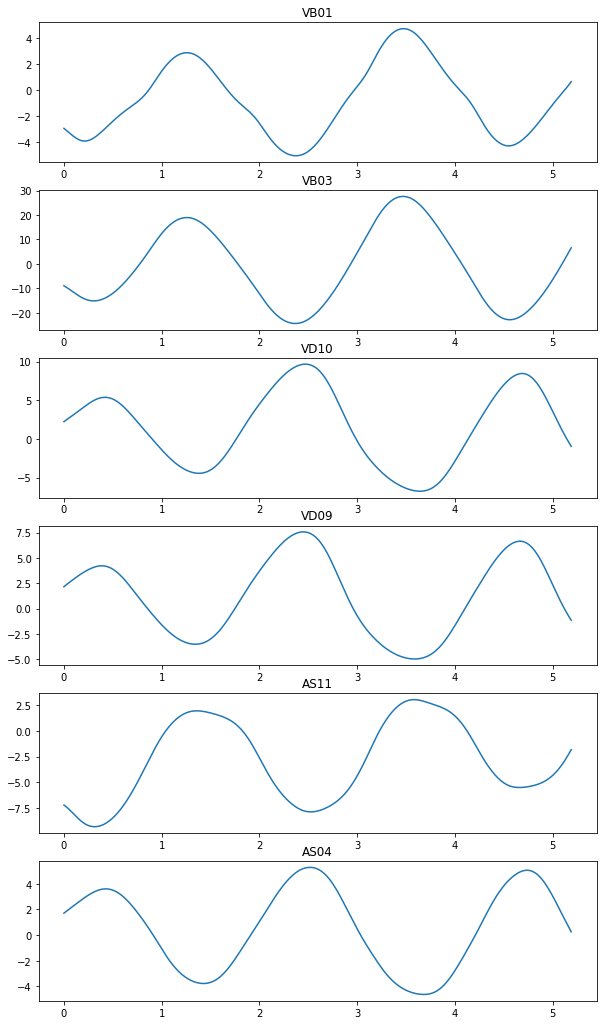

In [7]:
plot_saved_dynamics(['VB01', 'VB03', 'VD10', 'VD09', 'AS11', 'AS04'], fwd_dynamics, neuron_metadata_collection)

### Interneurons

In [8]:
df[df['type'] == 'INTERNEURON'].nlargest(15, ['amplitude'])

,name,type,amplitude
260,LUAL,INTERNEURON,85.744185
269,PVR,INTERNEURON,82.929592
265,LUAR,INTERNEURON,59.872973
253,DVA,INTERNEURON,51.538199
44,ALA,INTERNEURON,41.883008
96,AVBL,INTERNEURON,35.889829
105,AVBR,INTERNEURON,35.790744
277,PVNL,INTERNEURON,26.412977
83,SIBVL,INTERNEURON,21.368233
223,SDQL,INTERNEURON,19.828663


Statement to reproduce:

"Most responsive interneurons turn out to be AVB, LUA, DVA, PVR, and PVC."

Yeah, I think we see the whole cast here.

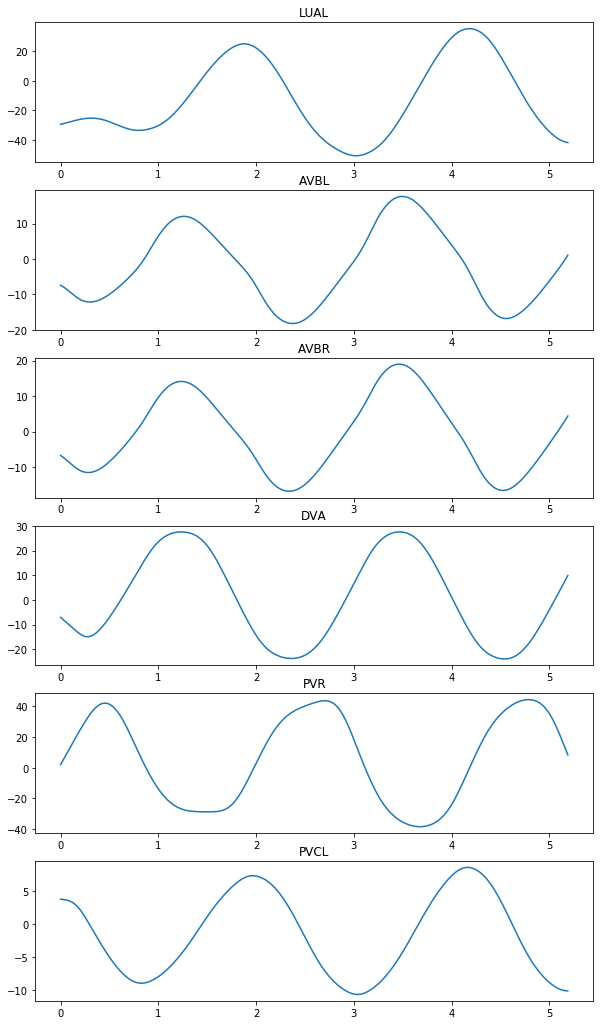

In [9]:
plot_saved_dynamics(['LUAL', 'AVBL', 'AVBR', 'DVA', 'PVR', 'PVCL'], fwd_dynamics, neuron_metadata_collection)